$\Large \text{Course project for EE769 : Introduction to Machine learning }$ 

\\
$\large \textbf{Vehicle detection for self driving cars}$

\\
$\textbf{Under the guidance of  prof. Amit Sethi}$


In [ ]:
#necessary packages
import glob #to access files
import cv2 as cv2 #OpenCV for image processing
import numpy as np #vector array operations
import matplotlib.pyplot as plt #plots
import random #random number generator
from skimage.feature import hog #for Histogram of Gradient analysis
from zipfile import ZipFile as zip #Unzipping files as dataset is in zip file type

#Importing Datasets :
$\text{The dataset provided for the project is a combination of datasets from various sources.These sources are GTI vehicle image database (GTI),KITTI vision benchmark suite}$$\text{and extra images extracted from Udacity's project video.The sets of GTI Far, GTI left,GTI Right and GTI MiddleClose are from the same source of GTI with different}$$\text{viewpoints.Together with the KITTI examples they constitute the whole set of vehicle images.The images from udacity's project video are used as test images along with }$ $\text{some random images from net.}$

$\text{The datasets are open-sourced and open to use for analysis for all.}$

\\
$\text{Dataset credits :} $
1. $\text{GTI vehicle image database : }$ [http://www.gti.ssr.upm.es/data/Vehicle_database.html](https://) 

2. $\text{KUTTI vision bechmark suite : }$KUTTI :[http://www.cvlibs.net/datasets/kitti/](https://)

\\
$\text{direct link to access\download dataset , we have uploaded the data on G-drive for better access .: }$

1. $\text{car data :}$ https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/vehicles.zip
2. $\text{non-car data :}$ https://s3.amazonaws.com/udacity-sdc/Vehicle_Tracking/non-vehicles.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive

#Extracting zip files datasets 
car_data = zip('/content/drive/MyDrive/vehicles.zip' , 'r').extractall()
print("Succcesssfuly unzipped data from car_data" )
non_car_data = zip('/content/drive/MyDrive/non-vehicles.zip' , 'r').extractall()
print("Succcesssfuly unzipped data from non_car_data")

#Accessing content of datasets
vehicle_image = glob.glob('/content/vehicles/**/*.png', recursive=True) #obtain only image files
print("Successfully retrieved vehicle image data ! \nData details : Found {total} images".format(total = len(vehicle_image)))
non_vehicle_image = glob.glob('/content/non-vehicles/**/*.png', recursive=True) #obtain only image files
print("Successfully retrieved vehicle image data ! \nData details : Found {total} images".format(total = len(non_vehicle_image)))

Succcesssfuly unzipped data from car_data
Succcesssfuly unzipped data from non_car_data
Successfully retrieved vehicle image data ! 
Data details : Found 8792 images
Successfully retrieved vehicle image data ! 
Data details : Found 8968 images


$\text{Reference for zipfile module :}$ [https://docs.python.org/3/library/zipfile.html](https://) \\
$\text{Reference for glob module :}$ [https://docs.python.org/3/library/glob.html](https://)

#Reading dataset and visualizing data

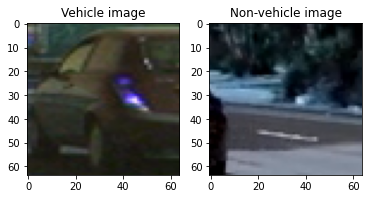

In [ ]:
#reading image data
vehicle_image = [] #store individual images of vehicles only
path = glob.glob('/content/vehicles/**/*.png', recursive=True)
for imgpath in path:
  car = cv2.imread(imgpath) #read files from path
  pic = cv2.cvtColor(car , cv2.COLOR_BGR2RGB) #convert to RGB #for visualizing only
  #plt.show()
  vehicle_image.append(pic) #append in list


non_vehicle_image = []
path1 = glob.glob('/content/non-vehicles/**/*.png', recursive=True)
for imgpath in path1 :
  car1 = cv2.imread(imgpath)
  pic = cv2.cvtColor(car1 , cv2.COLOR_BGR2RGB)
  non_vehicle_image.append(pic)

#loading last two images in datasets
fig , (ax1 , ax2)  = plt.subplots(1,2)
ax1.imshow(car)
ax1.set_title("Vehicle image")
ax2.imshow(car1)
ax2.set_title("Non-vehicle image")
plt.show()

In [ ]:
print("Shape of Vehicle Image : {a}".format(a = vehicle_image[0].shape))
print("Shape of Non Vehicle Image : {b} ".format( b = non_vehicle_image[0].shape))

Shape of Vehicle Image : (64, 64, 3)
Shape of Non Vehicle Image : (64, 64, 3) 


$\text{Indicates pixel size of image as  64$\times$64 , and 3 channels / colors. }$

$\text{Reference for Hog and how to use it :}$ \\

[https://lilianweng.github.io/lil-log/2017/10/29/object-recognition-for-dummies-part-1.html](https://)

[https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html](https://)



In [ ]:
#Using hog module to get hog features
def Generate_hog_features(image, orientation ,cellsPerBlock,pixelsPerCell, visualize=True ) :
  #Forcing only certain input datatypes to be accepted

  assert type(orientation) and type(cellsPerBlock) and type(pixelsPerCell) is int
  assert type(visualize) is bool

  if (visualize==True) :
    hog_features, hog_image = hog(image , orientations = orientation, pixels_per_cell=(pixelsPerCell, pixelsPerCell),  cells_per_block=(cellsPerBlock, cellsPerBlock), visualize=True )
    return hog_features, hog_image
  
  else:
    hog_features = hog(image, orientations=orientation ,pixels_per_cell=(pixelsPerCell, pixelsPerCell), cells_per_block=(cellsPerBlock, cellsPerBlock), visualize=False )
    return hog_features

Text(0.5, 1.0, 'HoG of Non-vehicle image')

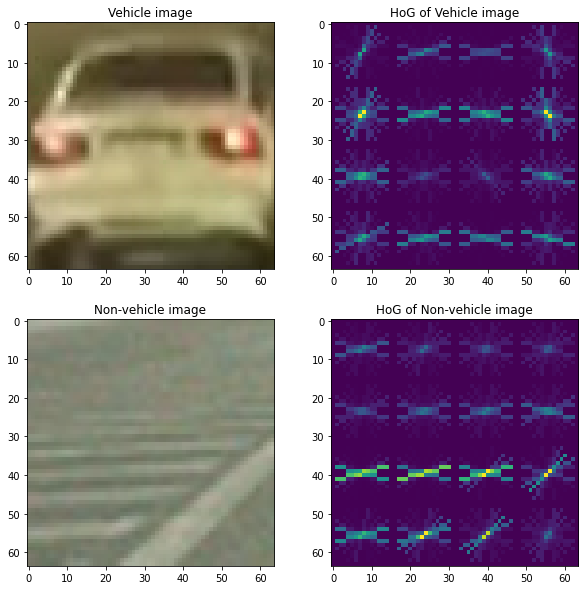

In [ ]:
#testing HOG function
#first the values of inputs are randomly chosen the final values will be updated after feature selection
feature, hog_img = Generate_hog_features(image = vehicle_image[1] ,orientation = 10, cellsPerBlock = 3, pixelsPerCell=16 ,visualize=True )
feature1, hog_img1 = Generate_hog_features(image = non_vehicle_image[1] ,orientation = 10, cellsPerBlock = 3, pixelsPerCell=16 ,visualize=True )

#plotting images

f, (x1 , x2) = plt.subplots(2,2,figsize=(10,10)) #x1 for 1st x axis and x2 for 2nd x axis which are stacked vertically

x1[0].set_title("Vehicle image")
x1[0].imshow(vehicle_image[1])
x1[1].imshow(hog_img)
x1[1].set_title("HoG of Vehicle image")
x2[0].imshow(non_vehicle_image[1])
x2[1].imshow(hog_img1)
x2[0].set_title("Non-vehicle image")
x2[1].set_title("HoG of Non-vehicle image")

$\text{Color spaces plays a vital role in hog analysis , to check this effect ,the above hog features can be redrawn from optimum color space obtained.}$

Text(0.5, 1.0, 'HoG of Non-vehicle image')

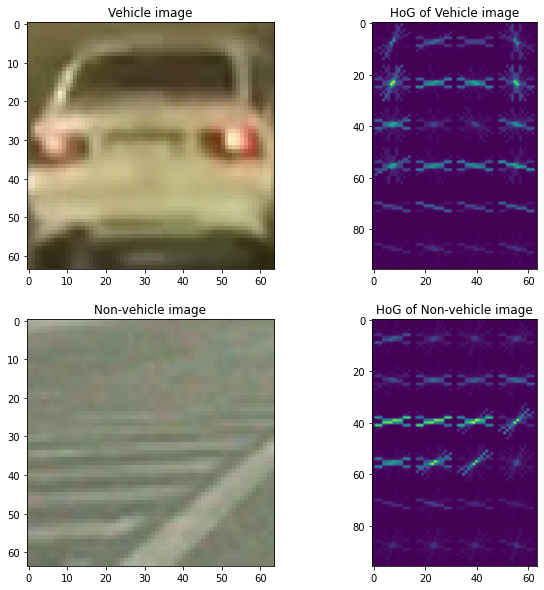

In [ ]:
#testing HOG function on random colorspaces
image = cv2.cvtColor(vehicle_image[1], cv2.COLOR_RGB2YUV_IYUV)
image1 = cv2.cvtColor(non_vehicle_image[1] , cv2.COLOR_RGB2YUV_IYUV)

feature, hog_img = Generate_hog_features(image = image ,orientation = 10, cellsPerBlock = 3, pixelsPerCell=16 ,visualize=True )
feature1, hog_img1 = Generate_hog_features(image = image1 ,orientation = 10 , cellsPerBlock = 3, pixelsPerCell=16 ,visualize=True )

#plotting images
f, (x1 , x2) = plt.subplots(2,2,figsize=(10,10)) #x1 for 1st x axis and x2 for 2nd x axis which are stacked vertically

x1[0].set_title("Vehicle image")
x1[0].imshow(vehicle_image[1])
x1[1].imshow(hog_img)
x1[1].set_title("HoG of Vehicle image")
x2[0].imshow(non_vehicle_image[1])
x2[1].imshow(hog_img1)
x2[0].set_title("Non-vehicle image")
x2[1].set_title("HoG of Non-vehicle image")

$\text{Hog features of non-vehicle image are very distinctive in earlier color space but now it is some what became blurred.}$
$\text{Hence by choosing appropriate color space we can improve the quality of features.}$

In [ ]:
#extract hog features for all images 
def ExtractFeatures(images,orientation,cellsPerBlock,pixelsPerCell):
  featureList = [] #store features
  for image in images:
    image= cv2.cvtColor(image, cv2.COLOR_RGB2YUV) #as this color specification gave highest accuracy during feature selection
    features_of_channel1 = Generate_hog_features(image[:,:,0],orientation,cellsPerBlock,pixelsPerCell, False) #as hog can generate feature per column of image color. for more see :https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html
    features_of_channel2 = Generate_hog_features(image[:,:,1],orientation,cellsPerBlock,pixelsPerCell, False)
    features_of_channel3 = Generate_hog_features(image[:,:,2],orientation,cellsPerBlock,pixelsPerCell, False)
    feature = np.hstack((features_of_channel1 , features_of_channel2 ,features_of_channel3)) #as fetaures should appear column wise for an image stacking horizontally
    #print(feature.shape)
    featureList.append(feature) #generating features as an array list
  
  return featureList

$\text{Extracting hog features for image dataset at values which we obtained from feature selection step.}$

In [ ]:
orientations = 9
cellsPerBlock = 2
pixelsPerBlock = 8
vehicleFeatures = ExtractFeatures(vehicle_image,orientations,cellsPerBlock,pixelsPerBlock)
nonVehicleFeatures = ExtractFeatures(non_vehicle_image,orientations,cellsPerBlock,pixelsPerBlock)

$\text{As over dataset had separate vehicle and non-vehicle dataset , we can assign them labels.As only 2 classes are their we will assign binary values to label.}$

In [ ]:
#feature list will be list of all fetures stacked vertically
features = np.vstack([vehicleFeatures, nonVehicleFeatures])
print("Shape of features list is ", features.shape)

#label will be 1 for vehicle detected and 0 for non vehicle detected
assigned_labels= np.concatenate([np.ones(len(vehicleFeatures)), np.zeros(len(nonVehicleFeatures))])
print("Shape of label list is ", assigned_labels.shape)

Shape of features list is  (17760, 5292)
Shape of label list is  (17760,)


$\text{As we have a total of 17760 images , the rows generated are 17760 and for each image 5291 hog features are extracted by using Extractfeature function.}$ \\
$\text{For 17760 images we have labelled each vehicle image as 1 and non_vehicle image as 0.}$ \\
$\text{In this way our final data is ready for classification.}$

In [ ]:
#looking data with labels
import pandas as pd
df = pd.DataFrame(features)
df["Labels"] = assigned_labels
display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5253,5254,5255,5256,5257,5258,5259,5260,5261,5262,5263,5264,5265,5266,5267,5268,5269,5270,5271,5272,5273,5274,5275,5276,5277,5278,5279,5280,5281,5282,5283,5284,5285,5286,5287,5288,5289,5290,5291,Labels
0,0.328659,0.328659,0.049603,0.082532,0.275990,0.068160,0.008868,0.019187,0.017343,0.328659,0.328659,0.116247,0.046298,0.030764,0.004809,0.016167,0.009738,0.057075,0.052903,0.062355,0.107150,0.310880,0.325432,0.328659,0.017471,0.039878,0.000000,0.125184,0.133838,0.136004,0.105716,0.050359,0.087420,0.177853,0.112336,0.092403,0.429483,0.429483,0.169005,0.067311,...,0.148728,0.000000,0.0,0.268760,0.058839,0.260491,0.117678,0.268760,0.058839,0.148852,0.235356,0.000000,0.184195,0.058839,0.268760,0.176517,0.268760,0.000000,0.186065,0.058839,0.000000,0.268760,0.000000,0.186065,0.000000,0.236822,0.000000,0.186065,0.000000,0.0,0.210509,0.058839,0.186065,0.000000,0.268760,0.117678,0.268760,0.000000,0.000000,1.0
1,0.005912,0.008635,0.032653,0.096784,0.103468,0.003305,0.000000,0.000000,0.000000,0.029802,0.071516,0.266449,0.084208,0.056413,0.020614,0.023092,0.000000,0.045300,0.218664,0.152452,0.097724,0.105342,0.054690,0.048993,0.019962,0.027783,0.007537,0.477245,0.477245,0.477245,0.264160,0.000000,0.076999,0.000000,0.058433,0.166513,0.021189,0.050848,0.189446,0.059872,...,0.000000,0.000000,0.0,0.184216,0.119569,0.302206,0.000000,0.302206,0.202034,0.276428,0.000000,0.000000,0.302206,0.000000,0.115787,0.091538,0.302206,0.228845,0.302206,0.183076,0.000000,0.184216,0.000000,0.028947,0.000000,0.245622,0.000000,0.000000,0.000000,0.0,0.163748,0.000000,0.057894,0.000000,0.302206,0.000000,0.231575,0.000000,0.000000,1.0
2,0.275410,0.165706,0.015844,0.017942,0.151234,0.012511,0.055105,0.246225,0.275410,0.275410,0.154081,0.034267,0.027711,0.015467,0.000000,0.024437,0.115123,0.249217,0.275410,0.275410,0.089808,0.097062,0.261300,0.014683,0.161950,0.199359,0.270461,0.217255,0.109701,0.051402,0.134154,0.082990,0.074855,0.137425,0.141340,0.218662,0.265990,0.172730,0.038414,0.031065,...,0.076141,0.036763,0.0,0.038708,0.099806,0.095797,0.277142,0.277142,0.277142,0.277142,0.021638,0.061202,0.277142,0.043277,0.068426,0.083176,0.222570,0.178229,0.110837,0.221596,0.030601,0.277142,0.086553,0.144373,0.223455,0.277142,0.122612,0.089632,0.043277,0.0,0.277142,0.021638,0.068426,0.082841,0.174185,0.021638,0.095797,0.086553,0.202203,1.0
3,0.062714,0.045688,0.061182,0.101627,0.340069,0.340069,0.143747,0.026986,0.013106,0.223359,0.118830,0.056866,0.141537,0.340069,0.137750,0.074716,0.039932,0.014499,0.125471,0.000000,0.040743,0.146835,0.340069,0.250758,0.108034,0.100222,0.000000,0.056874,0.027049,0.110619,0.108732,0.044634,0.237115,0.333635,0.180955,0.168117,0.195691,0.104111,0.049822,0.124004,...,0.038376,0.000000,0.0,0.193169,0.053992,0.034148,0.000000,0.349581,0.161977,0.170738,0.053992,0.000000,0.241461,0.161977,0.273182,0.053992,0.349581,0.107984,0.102443,0.000000,0.000000,0.349581,0.000000,0.204886,0.053992,0.349581,0.000000,0.034148,0.000000,0.0,0.169022,0.053992,0.102443,0.130349,0.349581,0.000000,0.000000,0.000000,0.000000,1.0
4,0.029027,0.022981,0.020560,0.053911,0.331426,0.283286,0.119408,0.029684,0.060701,0.023591,0.007478,0.011036,0.035423,0.018951,0.042551,0.006306,0.018975,0.003525,0.331426,0.022295,0.082105,0.100666,0.331426,0.155573,0.331426,0.331426,0.331426,0.041564,0.033572,0.042916,0.053397,0.203653,0.060392,0.331426,0.162357,0.046355,0.055387,0.017557,0.025910,0.083167,...,0.057829,0.049429,0.0,0.041025,0.035540,0.084847,0.294465,0.294465,0.294465,0.078672,0.000000,0.025131,0.247648,0.035540,0.101149,0.017770,0.294465,0.286501,0.164632,0.121966,0.065533,0.182782,0.099734,0.147217,0.220036,0.294465,0.277383,0.062370,0.053310,0.0,0.166888,0.106621,0.101149,0.253093,0.143047,0.035540,0.107325,0.064194,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
try :
  if df.isnull().sum() >= 0 :
    print("There are missing values in some columns")
except :
  print("No missing values present in any column")
finally :
  print("Data checking completed !")


No missing values present in any column
Data checking completed !


In [ ]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17760 entries, 0 to 17759
Columns: 5293 entries, 0 to Labels
dtypes: float64(5293)
memory usage: 717.2 MB


$\text{We have checked for ambiguity like missing values or non-int or non-float datatypes in data frame and found that dataframe is ready for model fitting and no ambiguity exist.}$

$\text{Labelled dataset in .csv format is made availabel so that it can be used for analysis purpose whenever required and can save some time in generating hog again and again.}$

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5253,5254,5255,5256,5257,5258,5259,5260,5261,5262,5263,5264,5265,5266,5267,5268,5269,5270,5271,5272,5273,5274,5275,5276,5277,5278,5279,5280,5281,5282,5283,5284,5285,5286,5287,5288,5289,5290,5291,Labels
count,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,...,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000,17760.000000
mean,0.172203,0.083080,0.093251,0.121157,0.223411,0.108117,0.082685,0.071064,0.080757,0.184187,0.097008,0.118102,0.152897,0.200880,0.121245,0.090823,0.076396,0.085054,0.136224,0.112002,0.114031,0.140889,0.249436,0.124816,0.093756,0.081779,0.090259,0.152656,0.137428,0.147408,0.168234,0.207764,0.129123,0.096571,0.082790,0.092354,0.182383,0.095425,0.117187,0.153383,...,0.112440,0.065011,0.042670,0.184546,0.079945,0.138584,0.144082,0.257151,0.139117,0.132616,0.077714,0.053862,0.192319,0.080389,0.125745,0.119309,0.266022,0.115573,0.119982,0.079323,0.069070,0.213355,0.068111,0.120481,0.130499,0.243033,0.122087,0.112576,0.064638,0.042041,0.208673,0.064487,0.109855,0.113140,0.259855,0.106089,0.102441,0.062365,0.046534,0.495045
std,0.102314,0.085376,0.086284,0.103459,0.119050,0.094964,0.080456,0.074480,0.094053,0.100150,0.091355,0.098126,0.110549,0.130377,0.099348,0.085379,0.077462,0.094927,0.107768,0.103468,0.095290,0.106425,0.108653,0.101627,0.085267,0.080765,0.096388,0.109144,0.113818,0.113401,0.115388,0.129897,0.105655,0.088128,0.081534,0.095062,0.104875,0.093146,0.102451,0.118570,...,0.082647,0.070652,0.066968,0.101292,0.079049,0.091045,0.106299,0.095679,0.104661,0.087702,0.076955,0.076142,0.100943,0.078065,0.089509,0.099691,0.082555,0.098047,0.086000,0.077857,0.093159,0.094257,0.071436,0.087207,0.103042,0.099165,0.099263,0.082678,0.069763,0.064760,0.094553,0.070291,0.086354,0.098647,0.087763,0.093848,0.080445,0.068593,0.072227,0.499990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.080941,0.016720,0.024672,0.036852,0.130622,0.031068,0.019344,0.012382,0.006043,0.095308,0.022177,0.036102,0.057665,0.085974,0.039363,0.022926,0.014541,0.007908,0.038257,0.025242,0.035177,0.052755,0.184695,0.041134,0.025127,0.016266,0.010249,0.051652,0.038161,0.051434,0.069096,0.095731,0.038936,0.024097,0.016949,0.013047,0.090360,0.020182,0.032788,0.053768,...,0.045851,0.000000,0.000000,0.096618,0.009666,0.065709,0.053854,0.211819,0.048486

In [ ]:
#df.to_csv('final_data.csv', header = True , index = True) #getting labeeled data for future use

#Train-Test Split

$\text{We will be using 67% data as training data and rest is validation data.Also shuffling is done to avoid overfitting the data.}$

In [ ]:
# train test split of data for validation
from sklearn.model_selection import train_test_split
X_train,  X_test, Y_train, Y_test = train_test_split(features, assigned_labels, test_size=0.33, shuffle=True , random_state = np.random.randint(low = 0 , high = 100))

#we have shuffled the data so that our model doesn't overfit and perform best not just for training data

print("Size of training data : " , X_train.shape)
print("Size of testing data : " , X_test.shape)
print("Size of training labels : " , Y_train.shape)
print("Size of testing labels : " , Y_test.shape)

Size of training data :  (11899, 5292)
Size of testing data :  (5861, 5292)
Size of training labels :  (11899,)
Size of testing labels :  (5861,)


$\text{We have use 67% of total data as training data and rest is validation data}$

#Selecting model
$\text{we have tried fitting different models like SVC , Random forest and Adaboost and tested it on validation data .}$$\text{The model which will give best result on validation data can be selected as model to predict(classify) the final test data.}$

$\text{Perceptron algorithm is good for binary classification and our first approach is to check its performance on our data. Loss penalty is taken as an hyper parameter.}$

\\

$\text{To avoid overfitting we have performed 5 fold cross validation, in perceptron.}$

In [ ]:
from sklearn.linear_model import Perceptron
from timeit import default_timer as timer
from sklearn.model_selection import GridSearchCV
hyper_par = {'penalty' : ['l1' , 'l2' , 'elasticnet']}
esti = Perceptron( random_state= 42 , shuffle = True)
clf = GridSearchCV(estimator = esti , param_grid = hyper_par , cv = 5 , verbose = 3)
a = timer()
clf.fit(X_train , Y_train)
b = timer()
print("time to train classifier is {time} seconds".format(time = round(b-a ,4)))
print("best parameters found by grid search are {}: ".format(clf.best_params_))
print("Accuracy of perceptron is {score} % ".format(score = round(clf.score(X_test,Y_test),4)*100))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] penalty=l1 ......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......................... penalty=l1, score=0.980, total=   5.4s
[CV] penalty=l1 ......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV] .......................... penalty=l1, score=0.978, total=   5.0s
[CV] penalty=l1 ......................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.4s remaining:    0.0s


[CV] .......................... penalty=l1, score=0.984, total=   6.9s
[CV] penalty=l1 ......................................................
[CV] .......................... penalty=l1, score=0.984, total=   5.4s
[CV] penalty=l1 ......................................................
[CV] .......................... penalty=l1, score=0.976, total=   5.3s
[CV] penalty=l2 ......................................................
[CV] .......................... penalty=l2, score=0.973, total=   1.2s
[CV] penalty=l2 ......................................................
[CV] .......................... penalty=l2, score=0.910, total=   0.9s
[CV] penalty=l2 ......................................................
[CV] .......................... penalty=l2, score=0.918, total=   1.0s
[CV] penalty=l2 ......................................................
[CV] .......................... penalty=l2, score=0.958, total=   1.3s
[CV] penalty=l2 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   59.0s finished


time to train classifier is 66.8076 seconds
best parameters found by grid search are {'penalty': 'l1'}: 
Accuracy of perceptron is 98.45 % 


In [ ]:
time_taken_perce = round(b-a , 4) 
accuracy_perc = round(clf.score(X_test,Y_test),4)*100

$\Large \text{SVC :}$ \\

$\text{As we have to do binary classification easiest option available is Support vector classifier}$
$\text{As 5 fold validation was talking too much time , reduced the validation to 3 folds.}$

In [ ]:
from sklearn.svm import SVC

hyper_param = {'kernel' : ['linear' , 'rbf'] , 'C' : [ 0.1 , 1 , 10 ]}

svc = SVC()

t = timer()

clf = GridSearchCV(estimator = svc , param_grid = hyper_param , verbose = 3 , cv = 3)
clf.fit(X_train,Y_train)
print('Best parameters : {p}'.format(p = clf.best_params_))
print("Best scoring :" + str(clf.best_score_))

b = timer()

print("time taken to train SVC classifier is {time} seconds".format(time = round(b-t ,4)))
print("mean accuracy of support vector classifier is {score} % ".format(score = round(clf.score(X_test,Y_test),4)*100))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ C=0.1, kernel=linear, score=0.985, total= 1.3min
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV] ................ C=0.1, kernel=linear, score=0.987, total= 1.3min
[CV] C=0.1, kernel=linear ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.5min remaining:    0.0s


[CV] ................ C=0.1, kernel=linear, score=0.986, total= 1.3min
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.982, total= 4.3min
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.980, total= 4.2min
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.980, total= 4.2min
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.985, total= 1.3min
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.987, total= 1.3min
[CV] C=1, kernel=linear ..............................................
[CV] .................. C=1, kernel=linear, score=0.986, total= 1.3min
[CV] C=1, kernel=rbf .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 38.5min finished


Best parameters : {'C': 10, 'kernel': 'rbf'}
Best scoring :0.9936128803086041
time taken to train SVC classifier is 2490.3252 seconds
mean accuracy of support vector classifier is 99.52 % 


In [ ]:
time_taken_svc = round(b-t , 4)
accuracy_svc = round(clf.score(X_test,Y_test),4)*100
compare_df = pd.DataFrame()

#Random Forest Classifier

$\text{To see how tree based method perform on binary classification.}$

In [ ]:
#Training random forest classifier to check how tree based models perform
from sklearn.ensemble import RandomForestClassifier
from timeit import default_timer as timer
hyper_param = {'n_estimators' : [150 , 200]}
a = timer()
rfc = RandomForestClassifier()
classifier1 = GridSearchCV(estimator = rfc , param_grid = hyper_param , cv = 3 , verbose = 3) #performing 2 fold cross validation #default value 5
classifier1.fit(X_train,Y_train)
b = timer()
print("time to train SVC classifier is {time} seconds".format(time = round(b-a ,4)))
print("best parameters found by grid search are {}: ".format(classifier1.best_params_))
print("Accuracy of SVC is {score} % ".format(score = round(classifier1.score(X_test,Y_test),4)*100))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] n_estimators=150 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=150, score=0.977, total= 1.4min
[CV] n_estimators=150 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV] .................... n_estimators=150, score=0.979, total= 1.4min
[CV] n_estimators=150 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.8min remaining:    0.0s


[CV] .................... n_estimators=150, score=0.981, total= 1.4min
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.976, total= 1.9min
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.978, total= 1.8min
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.981, total= 1.8min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  9.7min finished


time to train SVC classifier is 722.637 seconds
best parameters found by grid search are {'n_estimators': 150}: 
Accuracy of SVC is 98.09 % 


In [ ]:
time_taken_rf = round(b-a , 4)
accuracy_rf = round(classifier1.score(X_test,Y_test),4)*100

#Adaboost Classifier

$\text{Yan, Gang, et al. "Real-time vehicle detection using histograms of oriented gradients and AdaBoost classification." Optik 127.19 (2016): 7941-7951.}$

\\
$\text{The above reference concluded that AdaBoost can perform better than SVC in terms of accuracy and time but they have used two hog descripters for that experiment. }$

$\text{Checking whether same results can be obtained for single hog descriptor.}$

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from timeit import default_timer as timer
a = timer()
classifier1 = AdaBoostClassifier()
classifier1.fit(X_train,Y_train)
b = timer()
print("time to train Adaboost classifier is {time} seconds".format(time = round(b-a ,4)))
print("Accuracy of AdaBoost is {score} % ".format(score = round(classifier1.score(X_test,Y_test),4)*100))

time to train Adaboost classifier is 404.3983 seconds
Accuracy of AdaBoost is 97.50999999999999 % 


In [ ]:
time_taken_ab = round(b-a , 4)
accuracy_ab = round(classifier1.score(X_test,Y_test),4)*100

#Summary of model frameworks

In [ ]:
compare_df["Model framework"] = ["Perceptron","Support Vector Classifier" , "Random Forest classifier" , "AdaBoost Classifier"]
compare_df["Time to train"] = [time_taken_perce,time_taken_svc , time_taken_rf , time_taken_ab]
compare_df["accuracy"] = [accuracy_perc,accuracy_svc , accuracy_rf , accuracy_ab]
display(compare_df)

,Model framework,Time to train,accuracy
0,Perceptron,66.8076,98.45
1,Support Vector Classifier,2490.3252,99.52
2,Random Forest classifier,722.6370,98.09
3,AdaBoost Classifier,438.0988,97.13


$\text{SVC with 'rbf' kernel and C = 10 gave highest accuracy on validation data. SO using this as our final model for vehicle identification and prediction.}$

\\
$\text{the high value of C suggest that the SVC is soft SVC and as rbf kernel has infinite tail on both ends , our model may have overfitted for validation data.}$

\\
$\text{But as confirmed by our cross validation report, it gave the best result.Many researchers have suggested Linear SVC instead Kernel SVC (references are included in report).}$
$\text{But we will be using kerneled SVC and see how it turns out on test data.}$

$\text{final model fitting}$

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier1 = SVC(C = 10 , kernel = 'rbf')
classifier1.fit(X_train,Y_train) 

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

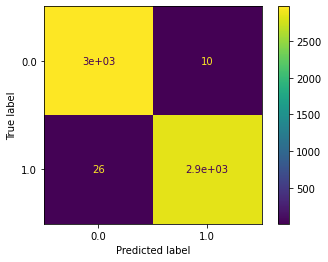

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score 
plot_confusion_matrix(classifier1 , X_test , Y_test)

$\text{For our selected classifier framework of Support vector classifier with Hyperparameter as C=10 and kernel = rbf }$$\text{, we can see from confusion matrix that the true positive and true negative are way more than false positive or false negative ,}$ $\text{ Hence we can use this model framework for our test data prediction with some modifications to remove false positive.}$

In [ ]:
score = roc_auc_score(Y_test , classifier1.predict(X_test))
print(f"roc-auc score obtained from SVC Classifier is {score}")

roc-auc score obtained from SVC Classifier is 0.9951943750911404


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, classifier1.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2977
         1.0       1.00      0.99      1.00      2884

    accuracy                           1.00      5861
   macro avg       1.00      1.00      1.00      5861
weighted avg       1.00      1.00      1.00      5861



$\text{From the classification report also we can see that precision and accuracy is very high also we have high f1 score indicating our classifier having more correct true positives.}$$\text{We have more cars in test dataset than non car from support values.}$

#Sliding windows approach for prediction in a image

In [ ]:
import matplotlib.image as mpimg #read and plot images
image = mpimg.imread('/content/drive/MyDrive/test6.jpg')
print("Y-axis range from 0 to {a} \nX-axis range from 0 to {b}  \nColors : {c}".format(a = image.shape[0] , b = image.shape[1],c =  image.shape[2]))

Y-axis range from 0 to 720 
X-axis range from 0 to 1280  
Colors : 3


$\text{ X-axis is from 0 to 1280 and Y-axis is from 0 to 720 , we can select a window size which can cover the entire image area say (64,64) as it can divide 1280 and 720 both.}$

$\text{In below function we generate windows of different size which covers the entire image space.}$

In [ ]:
# function to draw sliding Windows
def Generate_windows(image, windows) :
  new_image = np.copy(image) #copy of image to produce desired boxes on it without affecting original image
  thick = np.random.randint(low = 3 , high = 6) #thickness of box drawn

  for window in windows :

    color = (np.random.randint(low = 0 , high = 255) , 0 , 0 ) #RGB color values #only R taken i.e. red windows generated
    #print(color)
  
    cv2.rectangle(new_image, window[0], window[1], color, thick) #    # Draw a rectangle given coordinates
    
    #image copy with boxes drawn
  return new_image

In [ ]:
# function to find the windows on which we are going to run the classifier
def sliding_window(img, x_axis=[0 , 1280], y_axis=[0 , 720], window_shape = (16, 16), xy_overlap = (0.8, 0.8)) :

  assert x_axis[0] != None and x_axis[1] != None 
  assert y_axis[0] != None and y_axis[1] != None 

  window_list = [] #small windowss generated which covers entire image with window size = window_shape and overlapping allowed is  = 20 %

  x = x_axis[1] - x_axis[0]
  y = y_axis[1] - y_axis[0]
     
  windows_x = np.int( 1 + (x - window_shape[0])/(window_shape[0] * xy_overlap[0]))
  windows_y = np.int( 1 + (y - window_shape[1])/(window_shape[1] * xy_overlap[1]))

  for i in range(0,windows_y) :
    y_start = y_axis[0] + np.int( i * window_shape[1] * xy_overlap[1])
    
    for j in range(0,windows_x) :

      x_start = x_axis[0] + np.int( j * window_shape[0] * xy_overlap[0])
      x1 = np.int( x_start +  window_shape[0])
      y1 = np.int( y_start + window_shape[1])
      window_list.append(((x_start,y_start),(x1,y1)))

  return window_list

$\text{Randomly sliding over image didn't work out too well then refered to below repository and modified their idea to suit our needs of sliding window.}$
$\text{Formula of sliding window credit :}$ [https://github.com/harveenchadha/Udacity-CarND-Vehicle-Detection-and-Tracking](https://) 

\\
$\text{modification done: fixed the size of x axis , where to start and stop as dimension obtained previously and updated the same for Y axis.}$

$\text{function to identify car in window , returned 1 if car detected by classifier.}$

In [ ]:
def Highlight_Car(image,windows) :

  car_in_window = [] #store window dimension if car detected

  for window in windows :

    start = window[0]
    end = window[1]

    new_img = image[start[1]:end[1], start[0]:end[0]] #only checking one window at a time

    if (new_img.shape[1] == new_img.shape[0] and new_img.shape[1] != 0) : #as we are clipping only some part chances are we wouldn't get the needed square bracket #hence enforcing square brackets and rejecting empty end to the image

      new_img = cv2.resize(new_img, (64,64))  # resizing can reduce features of image
      features = ExtractFeatures([new_img], 9 , 2 , 8)
      predict = classifier1.predict([features[0]])
        
      if (predict == 1) :
        car_in_window.append(window)
          
  return car_in_window

$\text{We need to cover entire x axis so can set x start at 0 and stop at 1280, for Y axis we can select portion of the axis for prediction, we can chose entire axis also but will increase}$$\text{computational time to cover all windows.Hence only 60% part is considered that is start from 300 and end at 720 highest pixels.}$$\text{Also overlap of 80% is intially considered , will improve later if needed.Size of window need to be such that car at distance and nearby both should be discoverable }$$\text{For that variety of window sizes min at 24X24 and max at 96X96 is choosen.}$

Total No of windows are  18041
Windows which detects car : 35 


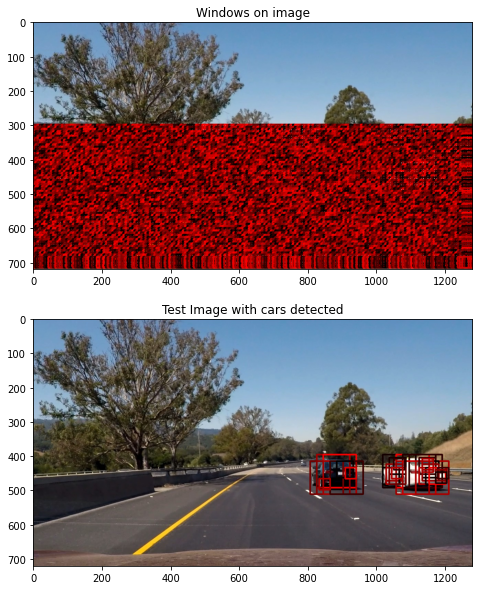

In [ ]:
#testing our functions of sliding_window and draw window. Defining here dummy windows
image = mpimg.imread('/content/drive/MyDrive/test6.jpg')

windows  = []
for i in range(1,4,1) :
  windows += sliding_window(image, x_axis=[0, 1280], y_axis=[300,720],window_shape=(96/i,96/i), xy_overlap=(0.20, 0.20))

print("Total No of windows are ", len(windows))
car_Windows = Highlight_Car(image,windows)
print("Windows which detects car : {} ".format(len(car_Windows)))
f,axes= plt.subplots(2,1, figsize=(10,10))

window_img = Generate_windows(image, windows) 
axes[0].imshow(window_img)
axes[0].set_title("Windows on image")
window_img = Generate_windows(image, car_Windows) 
axes[1].set_title("Test Image with cars detected")
axes[1].imshow(window_img)

$\text{Out of 18041 windows generated only 35 were able to detect the car,which is not very productive and we can reduce some windows further.}$

$\text{False positive can be removed , by setting certain threshold above which we can be sure that our detection is true else false .}$

In [ ]:
# function to increase the pixel by one inside each box if heat(car) detected
# applied only on windows with prediction = 1
def add_heat(heatmap, window_list):
  for window in window_list:
    # Add += 1 for all pixels inside each window where car detected
    heatmap[window[0][1]:window[1][1], window[0][0]:window[1][0]] += 1
    # Return updated heatmap
  return heatmap
#applying threshold to reduce false positives
def eliminate_false_positive(heatmap, threshold):
  heatmap[heatmap <= threshold] = 0 #make samples detected zero in heatmap if value is less than threshold
  return heatmap #return only heatmaps with more than threshold values

In [ ]:
#Drawing windows with only detected car windows and having pixels more than threshold .
def label_car_window(img, labels):
  # Iterate through all detected cars
  for car_number in range(1, labels[1]+1):
    # Find pixels with each car_number label value
    nonzero = (labels[0] == car_number).nonzero() #returns indices of element when condition is met #doc : https://numpy.org/doc/stable/reference/generated/numpy.nonzero.html
    # Identify x and y values of those pixels
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    #Define a bounding box using min and max values
    window = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
    # Draw the box on the image
    cv2.rectangle(img, window[0], window[1], (0,250,0), 5) #green colored just for fun
    # Return the image
  return img

$\text{Reference for label module :}$[https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.label.html?highlight=label#scipy.ndimage.label](https://)

$\text{Reasons to use :}$ \\
$\text{we are applying heat (increasing pixel by 1) to heatmap when label detected is true for car and its pixel are above certain threshold value}$
$\text{then we can use label module , which provides label features in an array for given input array.}$

$\text{Algo for below code :}$ \\
1.   form an array of zeros with same shape as of image
2.   increase array value by 1 when vehicle detected (add_heat function)
3.   eliminate false positive by applying threshold
4.   Use label module to generate labels using the array generated above (step 2)




#Testing on single image 
$\text{link to video from which image taken :}$[https://github.com/bdjukic/CarND-Vehicle-Detection/blob/master/test_video.mp4](https://)



 Number of Cars found -  2


Text(0.5, 1.0, 'Heatmap')

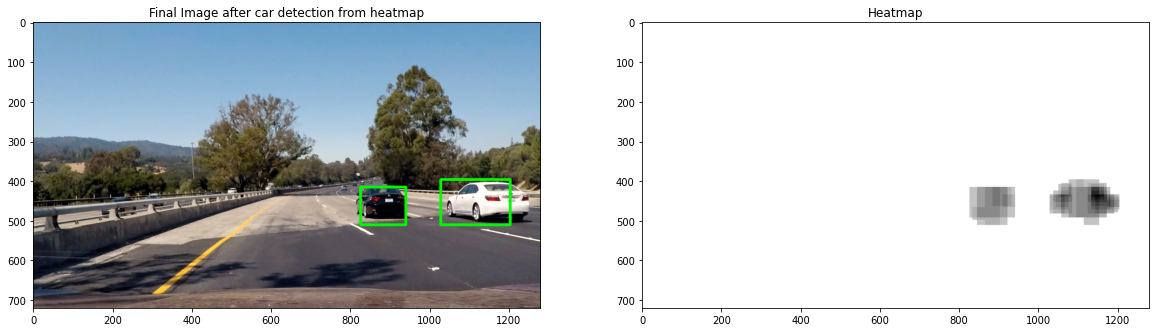

In [ ]:
#testing our heat function
from scipy.ndimage import label
image = mpimg.imread('/content/drive/MyDrive/test4.jpg')
heat = np.zeros_like(image[:,:,0]).astype(np.float) # array of zeros with shape as of given image
heat = add_heat(heat,car_Windows) #increment  pixel from 0 to 1 if heat(car) detected for windows as in above
heat = eliminate_false_positive(heat,2) # Apply threshold to help remove false positives   
heatmap = np.clip(heat, 0, 255) #value less than 0 becomes 0 and more than 255 becomes 255 for visualization

# Find final boxes from heatmap using label function
labels = label(heatmap)
print(" Number of Cars found - ",labels[1])

car_img = label_car_window(np.copy(image), labels)

f,axes= plt.subplots(1,2, figsize=(20,10))
axes[0].imshow(car_img)
axes[0].set_title("Final Image after car detection from heatmap")
axes[1].imshow(heatmap,cmap='gray_r')
axes[1].set_title("Heatmap")


$\text{The classifier is correctly able to identify the car on Udacity's test video image.}$

\\
$\text{Lets check its performance on random traffic image .}$
$\text{image source : }$ [https://www.youtube.com/watch?v=fGRlf5q_rg4](https://)
$\text{video credit and image credit :}$ $\text{Nikhil Patil Youtube Channel}$

 Number of Cars found -  2


Text(0.5, 1.0, 'Heatmap')

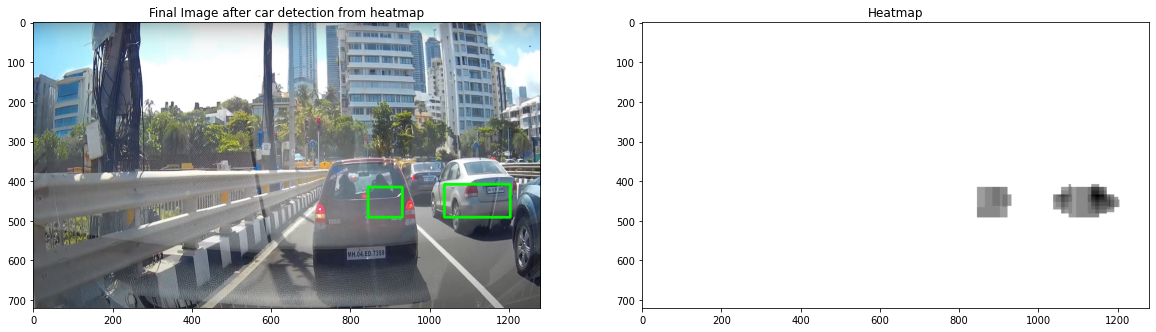

In [ ]:
#testing our heat function
from scipy.ndimage import label
windows = []
for i in range(1,4,1) :
  windows += sliding_window(image, x_axis=[0, 1280], y_axis=[0,720/i],window_shape=(16,16), xy_overlap=(0.70, 0.70))
image = mpimg.imread('/content/drive/MyDrive/Trials/test103.jpg')
heat = np.zeros_like(image[:,:,0]).astype(np.float) # array of zeros with shape as of given image
heat = add_heat(heat,car_Windows) #increment  pixel from 0 to 1 if heat(car) detected for windows as in above
heat = eliminate_false_positive(heat,4) # Apply threshold to help remove false positives   
heatmap = np.clip(heat, 0, 255) #value less than 0 becomes 0 and more than 255 becomes 255 for visualization

# Find final boxes from heatmap using label function
labels = label(heatmap)
print(" Number of Cars found - ",labels[1])

car_img = label_car_window(np.copy(image), labels)

f,axes= plt.subplots(1,2, figsize=(20,10))
axes[0].imshow(car_img)
axes[0].set_title("Final Image after car detection from heatmap")
axes[1].imshow(heatmap,cmap='gray_r')
axes[1].set_title("Heatmap")


$\text{For real life traffic image it is performing poorly, reasons for this are illustrated in report.}$
$\text{Good thing is we are able to identify atleast some vehicles in traffic.}$

In [ ]:
#defining the Parameters required for the pipeline to run from feature selection
orientation=9 # No of orientations of HOG
cellsPerBlock=2 # No of cells per block
pixelsPerCell=8 # No of pixels per cell
windows = []
for i in range(1,3,1) :
  windows += sliding_window(image, x_axis=[0, 1280], y_axis=[400,720],window_shape=(round(200/i),round(200/i)), xy_overlap=(0.20/i, 0.20/i))

$\text{For single image we have chosen fixed overlap of 80% but later through some trial and error we identified that we can improve the classification further by generating}$ $\text{windows at various overlapping ,so that we can cover the entire image and capture almost all cars in large image size.}$

#Pipeline for multiple images
$\text{pipeline will do the same operations on a sequence of images , which we did on single image in same sequence. }$

In [ ]:
# Defining a different pipeline to process the images
def PipelineImage(image):
  #algo is same as explained above for single image
  detect_cars = Highlight_Car(image,windows)   #detect car
  heat = np.zeros_like(image[:,:,0]).astype(np.float) #array of zero with shape that of image
  heat = add_heat(heat,detect_cars) #increase from 0 to 1 if car detected
  heatmap = np.clip(heat, 0, 255) #cisualize in image size(0,255)
  heatmap = eliminate_false_positive(heat, 1) #threshold = 2#to eliminate false positive
  labels = label(heatmap) #generate lables using label module
  draw_img = label_car_window(np.copy(image), labels) #draw image with detected car in a box
  return draw_img,heatmap

# prediction on test images
$\text{test images are compilation of images from Udacity's video and some youtube videos and used here just for analysis of our model }$

$\text{image credit as per above links specified earlier and www.youtube.com}$

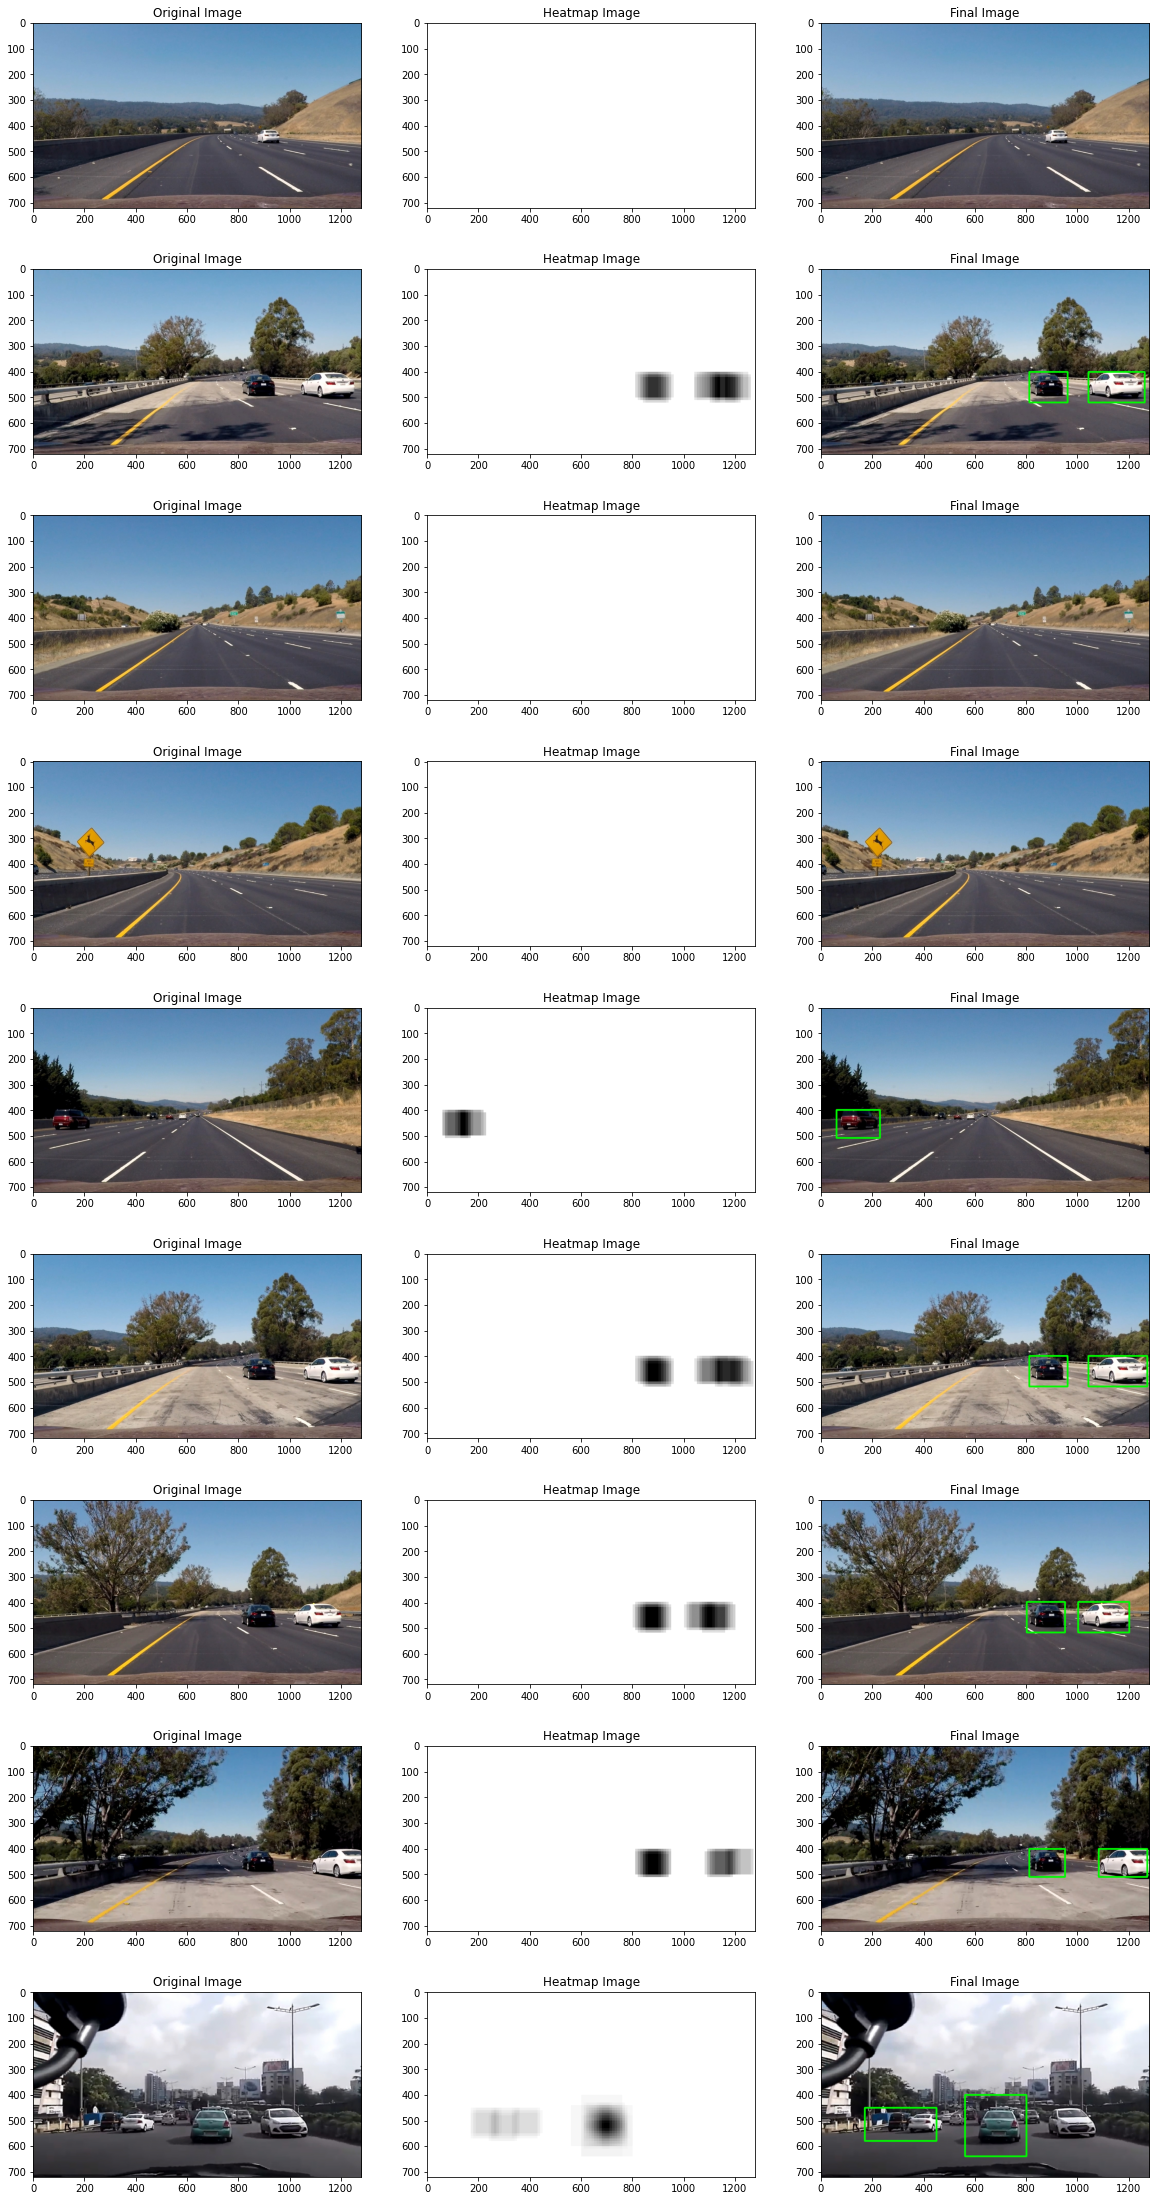

In [ ]:
test_images= glob.glob("/content/drive/MyDrive/test_images/*.jpg")
f, axes= plt.subplots(9,3, figsize=(20,40))

for index,image in enumerate(test_images):
  image = cv2.imread(image)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  finalPic,heatmap = PipelineImage(image)
  axes[index,0].imshow(image)
  axes[index,0].set_title("Original Image")
  axes[index,1].imshow(heatmap,cmap='gray_r')
  axes[index,1].set_title("Heatmap Image")
  axes[index,2].imshow(finalPic)
  axes[index,2].set_title("Final Image")

$\text{Reference for pipeline design} :$ [https://towardsdatascience.com/detecting-vehicles-using-machine-learning-and-computer-vision-e319ee149e10](https://)

\\

$\text{What we have done  apart from above reference:}$ 

1.   Modified Sliding windows for general use as reference has only 2,3 window sizes and not covered entire images
2.  Performed exclusive feature detection which was not done in reference
3. Hyperparameter tuning and different model performance analysed and compared, reference doen't did that
4. cross validation to reduce overfitting, reference doesn't have this also
5. Optimized window setting using trial and error , reference just took one window size
6. Other modification to make it work on any real time traffic images.

\\
$\text{These are few things and more details are included in final report}$


